In [4]:
import pandas as pd 

In [5]:
chess = pd.read_csv('Chess Data.csv')
type(chess)

pandas.core.frame.DataFrame

In [6]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


<h1> Trend 1: To determine best opening based on wins as the result


In [7]:
opening_black = chess[(chess['victory_status'] == 'mate') & (chess['winner'] == 'black')]
opening_white = chess[(chess['victory_status'] == 'mate') & (chess['winner'] == 'white')]
opening_result = pd.concat([opening_black, opening_white])

#opening_result.sort_values(by= 'opening_name').groupby(['opening_name', 'winner'])['winner'].count().sort_values().plot(kind = 'barh', x = 'opening_name')



<Axes: ylabel='opening_name'>

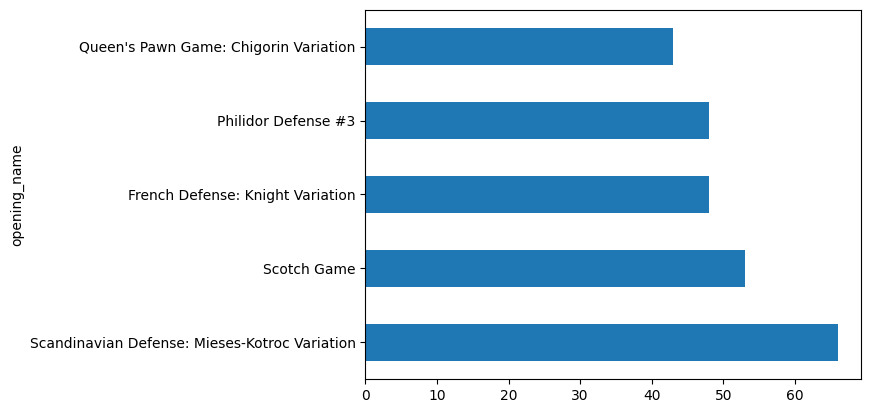

In [8]:
op_res_wht = chess[(chess['victory_status'] == 'mate') & (chess['winner'] == 'white')]
op_res_wht['opening_name'].value_counts().head(5).plot(kind = 'barh') 

Therefore, it is seen that the "Scandinavian Defense: Mieses-Kotroc Variation" leads to the most wins by white

<Axes: ylabel='opening_name'>

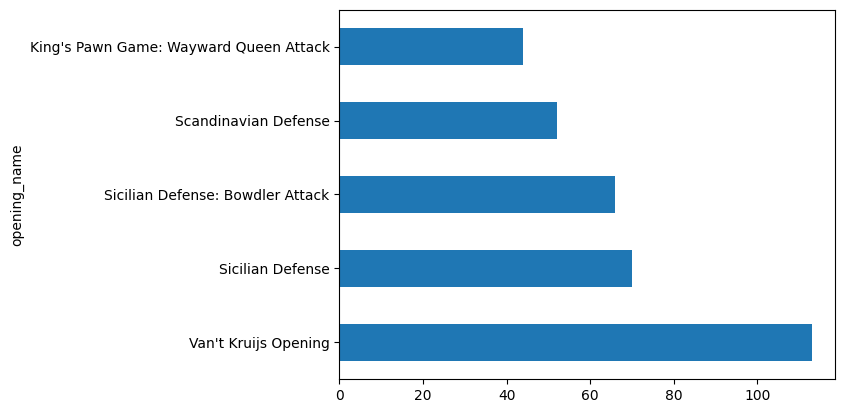

In [9]:
op_res_blk = chess[(chess['victory_status'] == 'mate') & (chess['winner'] == 'black')]
op_res_blk['opening_name'].value_counts().head(5).plot(kind = 'barh')  

And the "Van't Kruijs Opening" leads to the most wins by black

<h1> Trend 2: Comparison of rating of winner to number of turns it took to win 

In [17]:
chess['black_rating'].max()

2723

<Axes: xlabel='white_rating', ylabel='turns'>

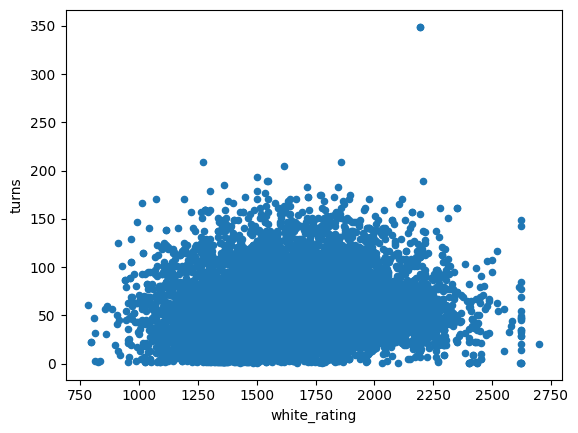

In [23]:
chess[chess['winner'] == 'white'].plot(kind = 'scatter', x = 'white_rating', y = 'turns')

<Axes: xlabel='black_rating', ylabel='turns'>

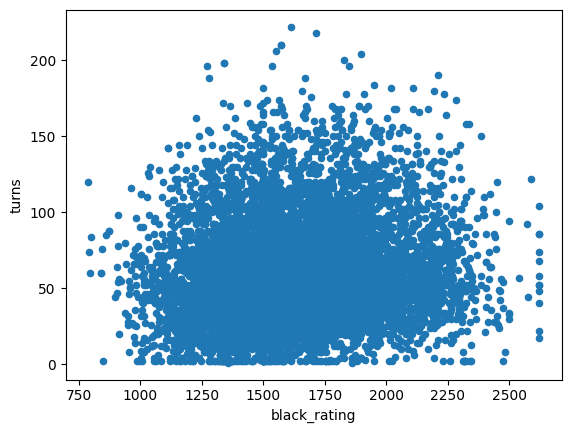

In [24]:
chess[chess['winner'] == 'black'].plot(kind = 'scatter', x = 'black_rating', y = 'turns')

There is no correlation between a player's rating and the number of turns it takes to defeat their opponent.

<h1> Trend 3: The trend of wins and losses when white has a higher rating than black, vice versa 

<Axes: xlabel='winner'>

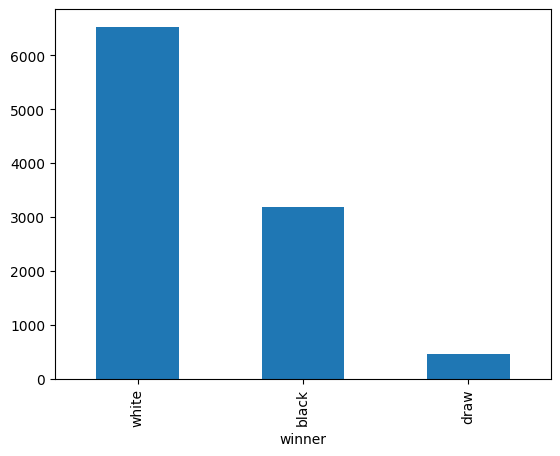

In [33]:
wht_win = chess[(chess['white_rating'] > chess['black_rating'])]['winner'].value_counts().plot(kind = 'bar')
wht_win

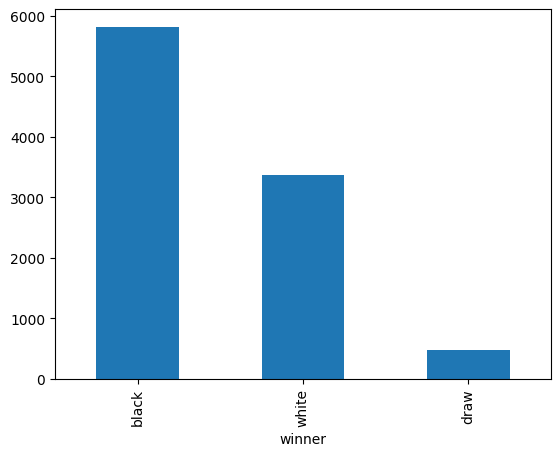

In [34]:
blk_win = chess[(chess['black_rating'] > chess['white_rating'])]['winner'].value_counts().plot(kind = 'bar')

Observing these two graphs, it seems that when white had the rating advantage, it won around twice as much. Black however, when having the rating advantage, seems to underperform the trend of white, though still having more wins than the lesser rated white player. 